In [1]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/krichards/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# directory containing fine-tuned model
model_save_path = './ftmodel'

In [3]:
original_model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

In [4]:
fine_tuned_model = SentenceTransformer(model_save_path)

In [5]:
# references: https://www.pinecone.io/learn/sentence-embeddings/
# function to obtain a matrix of cosine similarities for all sentence pairs
def get_similarities(model, sentences):
    embeddings = model.encode(sentences)

    mat = np.zeros((len(sentences), len(sentences)))
    
    for i in range(len(sentences)):
        mat[i:,i] = cos_sim(embeddings[i], embeddings[i:])

    return mat

In [6]:
uk_sentences = [
    'Англійська - не рідна мені мова.', # 'English is not my native language.'
    'Англійська - не моя рідна мова.', # 'English is not my native language.'
    'Мені хочеться щось випити.', # 'I want something to drink.'
    'Я маю настрій чогось випити.', # 'I am in the mood for something to drink.'
    'Мені потрібна їжа.', # 'I need food.'
    'Я голодний.', # 'I am hungry.'
    'Дякую, але ні.', # 'Thank you, but no.'
    'Ні, дякую.', # 'No, thank you.'
]

<AxesSubplot:>

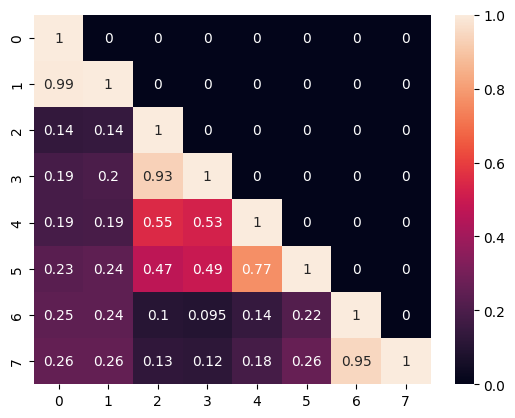

In [7]:
orig_sim_uk = get_similarities(original_model, uk_sentences)
sns.heatmap(orig_sim_uk, annot=True)


<AxesSubplot:>

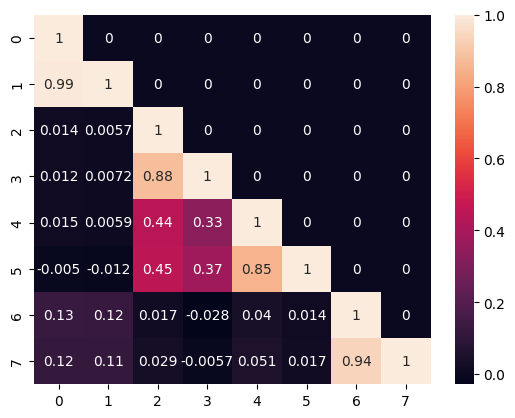

In [8]:
ft_sim_uk = get_similarities(fine_tuned_model, uk_sentences)
sns.heatmap(ft_sim_uk, annot=True)

In [9]:
en_sentences = [
    'English is not my native language.',
    'I want something to drink.',
    'I need food.',
    'Sometimes I struggle to understand.',
    'English is not my native language.',
    'I am in the mood for something to drink.',
    'Can you speak English?',
    'I only speak Ukrainian.'
]

<AxesSubplot:>

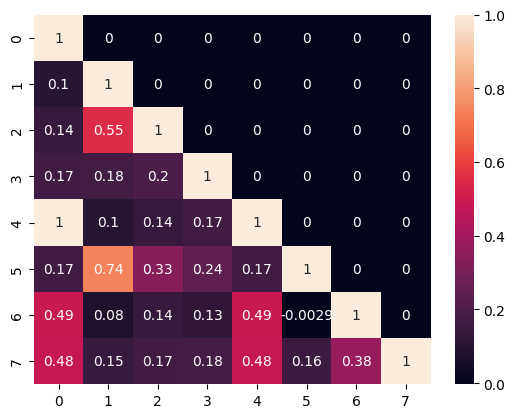

In [10]:
orig_sim_en = get_similarities(original_model, en_sentences)
sns.heatmap(orig_sim_en, annot=True)

<AxesSubplot:>

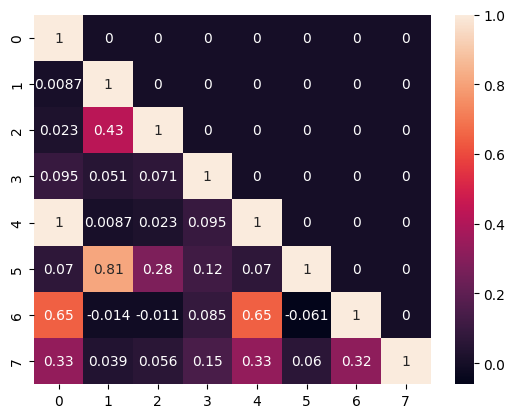

In [11]:
ft_sim_en = get_similarities(fine_tuned_model, en_sentences)
sns.heatmap(ft_sim_en, annot=True)

In [12]:
mix_sentences = [
    'Англійська - не рідна мені мова.',
    'English is not my native language.',
    'Мені хочеться щось випити.',
    'I want something to drink.',
    'Мені потрібна їжа.',
    'I need food.',
    'Іноді мені важко зрозуміти.',
    'Sometimes I struggle to understand.'
]

<AxesSubplot:>

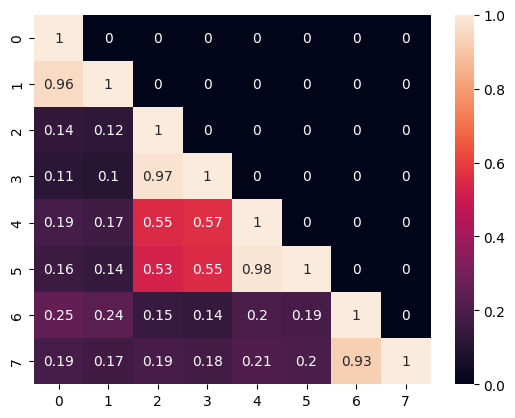

In [13]:
orig_sim_mix = get_similarities(original_model, mix_sentences)
sns.heatmap(orig_sim_mix, annot=True)

<AxesSubplot:>

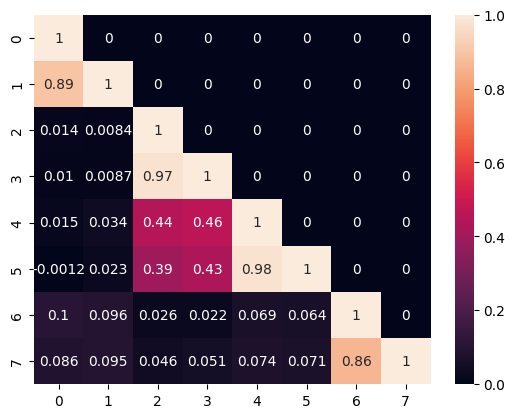

In [14]:
ft_sim_mix = get_similarities(fine_tuned_model, mix_sentences)
sns.heatmap(ft_sim_mix, annot=True)